# Tutorial 2

- Name: Siddhant Midha
- Roll no.: 200070078
- *Declaration*. I have adhered to the academic code of conduct and will do so in the future as well.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import tqdm
from qutip import *
plt.rcParams.update({'font.size': 25 })
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



## Exact Diagonalization (ED) implementation for fixed magnetization  ($M_z$) and spin-inversion ($\hat{\mathcal{I}}$) symmetries.




**Importance of Symmetries:**
-------------
The motivation for getting the information on conserved quantities under symmetry transformations is to make a block-diagonal form of Hamiltonian where each subspace becomes independent thereby reducing the Hilbert space dimension significantly.

(1) Consider the magnetization operator, $\mathcal{S}^z_T = \frac{1}{N}\sum\limits_i \hat{S}^z_i$.

We can show that,

\begin{align}
[\mathcal{S}^z_T,H] &= 0, \quad \textbf{Magnetization is a conserved quantity}\nonumber \\
\therefore \mathcal{S}^z_T|\psi\rangle &= M_z|\psi\rangle, \quad M_z \in \{0, \pm 1, \pm 2, ... \}
\end{align}



(2) Similarly,  consider the spin-inversion operator, $\mathcal{I} = \prod\limits_i S^x_i$ ( this form is valid for spin-1/2 only).

We can show that,

\begin{align}
[\mathcal{I},H] &= 0, \quad \textbf{Spin-inversion is a symmetry too} \nonumber \\
\therefore \mathcal{I}|\psi\rangle &= \pm 1|\psi\rangle, 
\end{align}


## Construction of the basis in the symmetry operator's basis:
### Fixed magnetization subspace:

As seen above, symmetries are operations or transformations that commute with the 
Hamiltonian, allowing
us to divide the basis in subspaces with well defined quantum numbers.
By means of similarity transformations, we can generate a sequence of
smaller matrices along the diagonal (i.e. the Hamiltonian matrix becomes
increasingly more “block diagonal”), and each of them can then be diagonalized 
independently.
For fermionic systems, the simplest symmetries are associated to the
conservation of the number of particles and the projection
$S_{total}^{z}$ of the total spin in the $z$ direction. In the spin-1/2
Heisenberg model, a matrix with $2^{N}\times 2^{N}$ elements can be
reduced to $2S+1$ smaller matrices, corresponding to the projections $%
m=(N_{\uparrow }-N_{\downarrow })/2=-S,-S+1,...,S-1,S$, with $S=N/2$.

The dimension of each of these subspaces is obtained from the
combinatory number $\left(
\begin{array}{c}
N \\
N_{\uparrow }
\end{array}
\right) = \frac{N!}{N_{\uparrow }!N_{\downarrow }!}$.

### Fixed Magnetization + Inversion symmetry subspace:
 
The dimension using the fixed magnetization subspace is already reduced to $^NC_{N/2}$. Further, using the Inversion symmetry present in the Hamiltonian we can reduce the dimension by a factor of 1/2. The new Hilbert-space dimension using this additional symmetry basis is $^NC_{N/2}/2$. For example, for N = 4, the no. of basis vectors in the magnetization subspace of $M_z=0$ is 6, then the dimension using the additional symmetry (Inversion symmetry, I) is 6/2 = 3. Building of this basis set goes in parallel to the magnetization basis except for the additional fact that one has to keep carefully track of the pair of basis set elements that is connected by the Inversion symmetry operator (e.g. using the "reference site" method discussed in class).

**NOTE : consider periodic boundary condition in all the cases.**

# I. Magnetization symmetry

## 1. Heisenberg model

 $$H = J\sum_{\langle i,j \rangle}S_{i}.S_{j}$$



### Exercise 1.1:  Show numerically that
1. $[\mathcal{S}^z_T,H]= 0$



In [3]:
def create_statedict(L):
    d = 2 #local Hilbert space dimension
    D = int(d ** L) #total Hilbert space direction
    states_dict = {}
    for i in range((D)):
        state = bin(i)[2:]
        state = '0'*(L-len(state)) + state 
        states_dict[i] = state 
    return states_dict
def sum_str(str):
    s = np.sum([2*int(bit)-1 for bit in list(str)])
    return s

def flipbits(state,i,j):
    copystate = state 
    copystate = list(copystate)
    bit_i = state[i]
    bit_j = state[j]
    if bit_i == '0':
        copystate[i] = '1'
    else:
        copystate[i] = '0'
    if bit_j == '0':
        copystate[j] = '1'
    else:
        copystate[j] = '0'
    copystate = ''.join(copystate)
    return copystate

def heisen_hamil(L,J,state_dict,BC='closed'):
    d = 2 #local Hilbert space dimension
    D = int(d ** L) #total Hilbert space direction
    H = np.zeros((D,D))
    sites = L-2 if BC == 'open' else L-1
    for site in range(sites):
        #loop over i = 0,1,...,L-2 as there are total L-1 2-local terms in OBC
        for i in range(D):
                state = state_dict[i]
                #diagonal part
                s_site = 2 * int(state[site]) - 1
                s_nextsite = 2 * int(state[(site+1)%L]) - 1 
                H[i,i] += s_site * s_nextsite * 1/4

                #off-diagonal part
                if state[site] != state[(site+1)%L]:
                    nextstate = flipbits(state,site,(site+1)%L)
                    # print(site, state, nextstate)
                    j  = int(nextstate,2)
                    H[i,j] += 1/2
    return H * J

def Sz_(L,state_dict):
    d = 2 #local Hilbert space dimension
    D = int(d ** L) #total Hilbert space direction
    sz = np.zeros((D,D))
    for i in range(D):
        sz[i,i] = sum_str(state_dict[i]) / 2 
    return sz / L

In [4]:
L = 4
J = 1

state_dict = create_statedict(L=L)
H = heisen_hamil(L=L,J=J,state_dict=state_dict)
Sz = Sz_(L,state_dict)



(<Figure size 800x600 with 2 Axes>, <Axes: >)

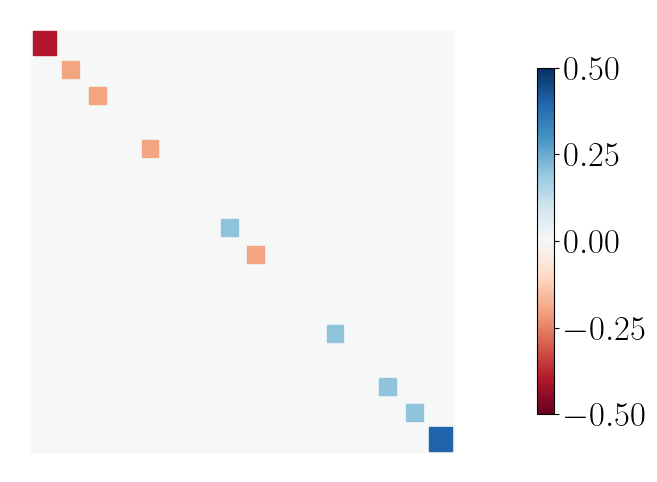

In [5]:
hinton(Sz)

(<Figure size 800x600 with 2 Axes>, <Axes: >)

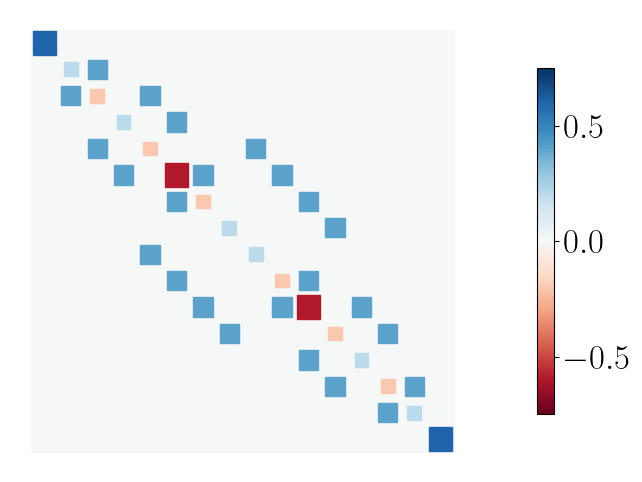

In [6]:
hinton(H)

In [7]:
if np.all(H @ Sz - Sz @ H == 0 ):
    print('commutes!')

commutes!


### Exercise 1.2:  Computing in fixed $M_z$ subspace
#### Questions:
1. Find the eigenvalue spectrum for $L=10$ and $L=11$ in all magnetization sector.
2. In which magnetization sector the ground state lie for even and odd system size and verify it's value with Full exact diagonalization.
3. Now combine the energies from all magnetization sector and plot the average energy per spin ($\langle E \rangle$) versus temperature(T) for $L=10$ from $T=0.1$ to $T=1$. 
4. Bonus : Compute specific heat  $C_{v}=\frac{d\langle E \rangle}{dT}$, make a plot for $T=0.1$ to $T=1$.

In [6]:
def find_ind(state,lookups):
    #state is in binary
    mag = sum_str(state)
    lookup = lookups[mag]
    low = 0
    high = len(lookup)
    mid = int(len(lookup)/2)
    while True:
        if int(lookup[mid],2) < int(state,2):
            low = mid
            mid = int((low+high)/2)
        elif int(lookup[mid],2) > int(state,2):
            high = mid
            mid = int((low+high)/2)
        elif int(lookup[mid],2) == int(state,2):
            return mag, mid 
        
def create_mag_lookups(L,state_dict):
    lookups = {}
    for mag in range(-L,L+1):
        ctr = 0
        lookup = {}
        for i in range(2**L):
            state = state_dict[i]
            if sum_str(state) == mag:
                lookup[ctr] = state 
                ctr += 1
        lookups[mag] = lookup
    return lookups


def create_hamil_mag(L,J,mag,lookups):
    lookup = lookups[mag]
    dim = len(lookup)
    ham = np.zeros((dim,dim))
    for site in range(L):
        for i in range(dim):
            state = lookup[i]
            #diagonal part
            s_site = 2 * int(state[site]) - 1
            s_nextsite = 2 * int(state[(site+1)%L]) - 1 
            ham[i,i] += s_site * s_nextsite * 1/4

            #off-diagonal part
            if state[site] != state[(site+1)%L]:
                nextstate = flipbits(state,site,(site+1)%L) # will always be in the same magnetization sector!
                mag_, j = find_ind(nextstate,lookups)
                if mag != mag_:
                    return "ERROR ERROR!!"
                ham[i,j] += 1/2
    return ham * J

# L = 10

/Users/siddhantm/miniconda3/envs/qt/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'Eigenvalue')

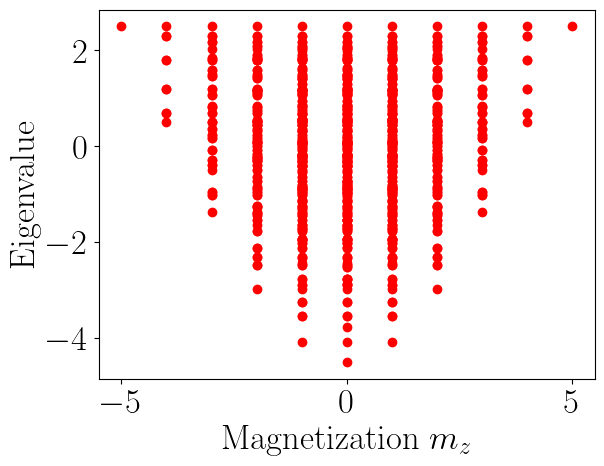

In [9]:
L = 10
J = 1
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J,mag,lookups) for mag in range(-L,L+1)]

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    if np.shape(h_mag) == (0,0):
        pass 
    v,_ = np.linalg.eig(h_mag) 
    for vv in v:
        plt.scatter(mag/2,vv,color='red')

plt.xlabel('Magnetization $m_z$')
plt.ylabel('Eigenvalue')

# L = 11

Text(0, 0.5, 'Eigenvalue')

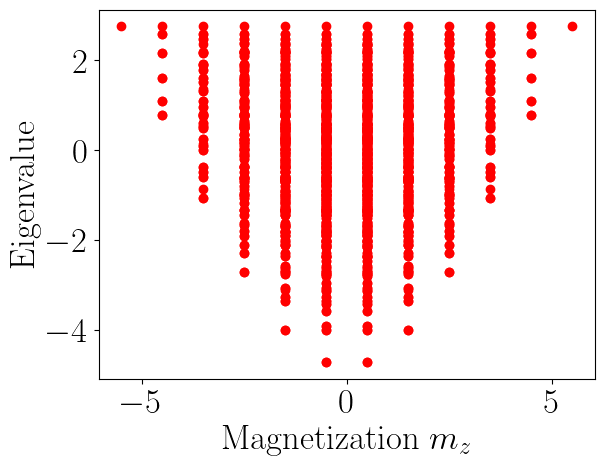

In [10]:
L = 11
J = 1
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J,mag,lookups) for mag in range(-L,L+1)]

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    if np.shape(h_mag) == (0,0):
        pass 
    v,_ = np.linalg.eig(h_mag) 
    for vv in v:
        plt.scatter(mag/2,vv,color='red')

plt.xlabel('Magnetization $m_z$')
plt.ylabel('Eigenvalue')

In [11]:
L = 10
J = 1
state_dict = create_statedict(L=L)
H = heisen_hamil(L=L,J=J,state_dict=state_dict)
Sz = Sz_(L,state_dict)

eigenvalues, eigenvectors = np.linalg.eig(H)

sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
actual_gs = sorted_eigenvectors[:,0] 
# if actual_gs is of the zero mag sector, then Sz \psi = 0 => check this!
thresh=  1e-10
if np.linalg.norm(Sz @ (actual_gs)) < thresh:
    print("Yes, zero mag sector has the ground state!")

Yes, zero mag sector has the ground state!


In [12]:
L = 11
J = 1
state_dict = create_statedict(L=L)
H = heisen_hamil(L=L,J=J,state_dict=state_dict)
Sz = Sz_(L,state_dict)

eigenvalues, eigenvectors = np.linalg.eig(H)

sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
actual_gs = sorted_eigenvectors[:,0] 
# if actual_gs is of the zero mag sector, then Sz \psi = 0 => check this!
thresh=  1e-10
if np.linalg.norm(Sz @ (actual_gs)) < thresh:
    print("Yes, zero mag sector has the ground state!")
else:
    cleanedList = [x for x in np.abs((Sz @ actual_gs)/actual_gs) if str(x) != 'nan']
    print("No, G.S. is NOT in the zero magnetization sector, instead, it is a superposition of the +- " + str(cleanedList[0]) + " sectors")

No, G.S. is NOT in the zero magnetization sector, instead, it is a superposition of the +- 0.4090909090909091 sectors


/var/folders/bv/ml429ql15qs_qzphdftwk2vw0000gn/T/ipykernel_76702/4037192459.py:18: RuntimeWarning: invalid value encountered in divide
  cleanedList = [x for x in np.abs((Sz @ actual_gs)/actual_gs) if str(x) != 'nan']


## taking weights in G.S. of each $m_Z$ sector only

Text(0.5, 0, '$T$')

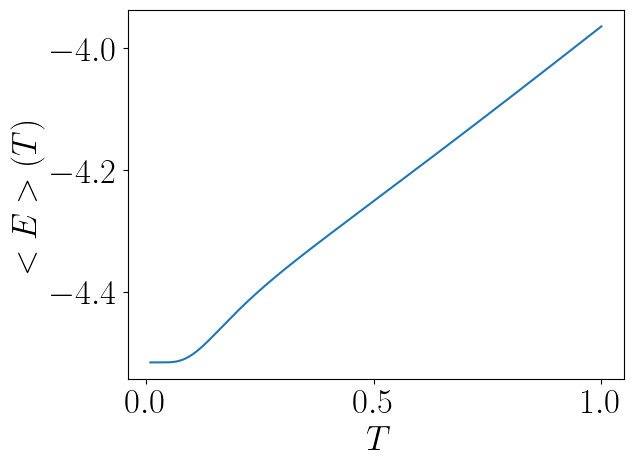

In [20]:
L = 10
J = 1
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J,mag,lookups) for mag in range(-L,L+1)]
gs_energies = []

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    eigenvalues ,_ = np.linalg.eig(h_mag) 
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    if len(sorted_eigenvalues) != 0:
        gs_energies.append(sorted_eigenvalues[0]) 

gs_energies = np.array(gs_energies)
T_arr = np.linspace(0.01,1.0,1000)
e = [np.sum(gs_energies * np.exp(-gs_energies/T)) / np.sum(np.exp(-gs_energies/T)) for T in T_arr]

plt.plot(T_arr,e)
plt.ylabel('$<E> (T)$')
plt.xlabel('$T$')

Text(0.5, 0, '$T$')

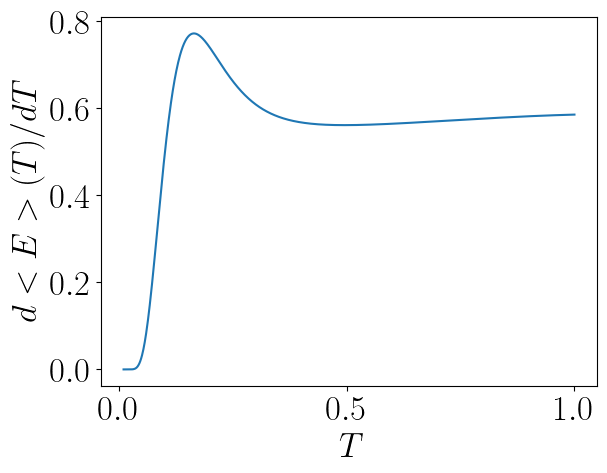

In [21]:
plt.plot(T_arr,np.gradient(e,T_arr))
plt.ylabel('$d<E> (T)/dT$')
plt.xlabel('$T$')

## taking weights of ALL states in each $m_Z$ sector

/var/folders/bv/ml429ql15qs_qzphdftwk2vw0000gn/T/ipykernel_76702/1586435827.py:16: RuntimeWarning: overflow encountered in exp
  e = [np.sum(all_energies * np.exp(-all_energies/T)) / np.sum(np.exp(-all_energies/T)) for T in T_arr]
/var/folders/bv/ml429ql15qs_qzphdftwk2vw0000gn/T/ipykernel_76702/1586435827.py:16: RuntimeWarning: invalid value encountered in multiply
  e = [np.sum(all_energies * np.exp(-all_energies/T)) / np.sum(np.exp(-all_energies/T)) for T in T_arr]
/var/folders/bv/ml429ql15qs_qzphdftwk2vw0000gn/T/ipykernel_76702/1586435827.py:16: RuntimeWarning: invalid value encountered in scalar divide
  e = [np.sum(all_energies * np.exp(-all_energies/T)) / np.sum(np.exp(-all_energies/T)) for T in T_arr]
/var/folders/bv/ml429ql15qs_qzphdftwk2vw0000gn/T/ipykernel_76702/1586435827.py:16: RuntimeWarning: overflow encountered in multiply
  e = [np.sum(all_energies * np.exp(-all_energies/T)) / np.sum(np.exp(-all_energies/T)) for T in T_arr]


Text(0.5, 0, '$T$')

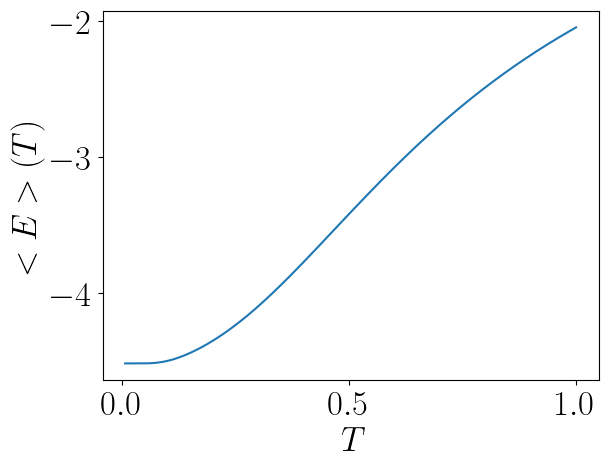

In [22]:
L = 10
J = 1
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J,mag,lookups) for mag in range(-L,L+1)]
all_energies = []

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    eigenvalues ,_ = np.linalg.eig(h_mag) 
    for eval in eigenvalues:
        all_energies.append(eval) 

all_energies = np.array(all_energies)
T_arr = np.linspace(0.001,1.0,1000)
e = [np.sum(all_energies * np.exp(-all_energies/T)) / np.sum(np.exp(-all_energies/T)) for T in T_arr]

plt.plot(T_arr,e)
plt.ylabel('$<E> (T)$')
plt.xlabel('$T$')

Text(0.5, 0, '$T$')

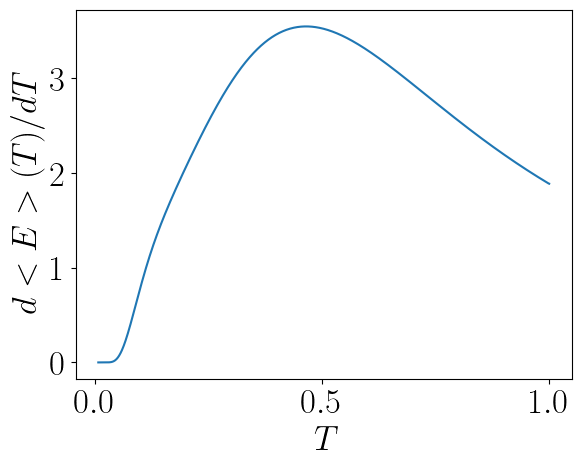

In [23]:
plt.plot(T_arr,np.gradient(e,T_arr))
plt.ylabel('$d<E> (T)/dT$')
plt.xlabel('$T$')

In [61]:
np.shape(hamils[1])

(0, 0)

## 2. Majumdar-Ghosh model

$$H = J_{1}\sum_{ i=1 }^{N}S_{i}.S_{i+1} + J_{2}\sum_{ i=1 }^{N}S_{i}.S_{i+2}$$  
where both $J_{1}$ and $J_{2}$ are positive and g is defined as $g=\frac{J_{2}}{J_{1}}$.

### Exercise 2.1:  Show numerically that
1. $[\mathcal{S}^z_T,H]= 0$ 
for $J_{1}=1, J_{2}=1$

### Exercise 2.2:  Computing in fixed $M_z$ subspace

#### Questions:
1. Find the eigenvalue spectrum for $L=10$ and $L=11$ in all magnetization sector. 
2. Does varying g changes the magnetization sector in which ground state lies, check for both even (e.g. L=12) and odd (e.g. L=11)system sizes?

In [86]:
def MG_hamiltonian(L,J1,J2,state_dict,BC='closed'):
    d = 2 #local Hilbert space dimension
    D = int(d ** L) #total Hilbert space direction
    H_2 = np.zeros((D,D))
    sites = L-2 if BC == 'open' else L-1
    for site in range(sites):
        #loop over i = 0,1,...,L-2 as there are total L-1 2-local terms in OBC
        for i in range(D):
                state = state_dict[i]
                #diagonal part of J1
                s_site = 2 * int(state[site]) - 1
                s_nextsite = 2 * int(state[(site+1)%L]) - 1 
                H_2[i,i] += s_site * s_nextsite * 1/4 * J1
                #diagonal part of J2
                s_site = 2 * int(state[site]) - 1
                s_nextsite = 2 * int(state[(site+2)%L]) - 1 
                H_2[i,i] += s_site * s_nextsite * 1/4 * J2


                #off-diagonal part of J1 
                if state[site] != state[(site+1)%L]:
                    nextstate = flipbits(state,site,(site+1)%L)
                    j  = int(nextstate,2)
                    H_2[i,j] += 1/2 * J1 

                #off-diagonal part of J12
                if state[site] != state[(site+2)%L]:
                    nextstate = flipbits(state,site,(site+2)%L)
                    j  = int(nextstate,2)
                    H_2[i,j] += 1/2 * J2
    return H_2

      
def Sz_(L,state_dict):
    d = 2 #local Hilbert space dimension
    D = int(d ** L) #total Hilbert space direction
    sz = np.zeros((D,D))
    for i in range(D):
        sz[i,i] = sum_str(state_dict[i]) / 2 
    return sz / L


In [87]:
L = 10
state_dict = create_statedict(L=L)
H_MG =  MG_hamiltonian(L,J1=1,J2=1,state_dict=state_dict,BC='closed')
Sz = Sz_(L=L,state_dict=state_dict)

if np.all(H_MG @ Sz - Sz @ H_MG == 0):
    print("Commutes indeed!")

Commutes indeed!


In [88]:
def find_ind(state,lookups):
    #state is in binary
    mag = sum_str(state)
    lookup = lookups[mag]
    low = 0
    high = len(lookup)
    mid = int(len(lookup)/2)
    while True:
        if int(lookup[mid],2) < int(state,2):
            low = mid
            mid = int((low+high)/2)
        elif int(lookup[mid],2) > int(state,2):
            high = mid
            mid = int((low+high)/2)
        elif int(lookup[mid],2) == int(state,2):
            return mag, mid 
        
def create_mag_lookups(L,state_dict):
    lookups = {}
    for mag in range(-L,L+1):
        ctr = 0
        lookup = {}
        for i in range(2**L):
            state = state_dict[i]
            if sum_str(state) == mag:
                lookup[ctr] = state 
                ctr += 1
        lookups[mag] = lookup
    return lookups


def create_hamil_mag(L,J1,J2,mag,lookups):
    lookup = lookups[mag]
    dim = len(lookup)
    ham = np.zeros((dim,dim))
    for site in range(L):
        for i in range(dim):
            state = lookup[i]
            #diagonal part J1
            s_site = 2 * int(state[site]) - 1
            s_nextsite = 2 * int(state[(site+1)%L]) - 1 
            ham[i,i] += s_site * s_nextsite * 1/4 * J1
            #diagonal part J2
            s_site = 2 * int(state[site]) - 1
            s_nextsite = 2 * int(state[(site+2)%L]) - 1 
            ham[i,i] += s_site * s_nextsite * 1/4 * J2

            #off-diagonal part J1
            if state[site] != state[(site+1)%L]:
                nextstate = flipbits(state,site,(site+1)%L) # will always be in the same magnetization sector!
                mag_, j = find_ind(nextstate,lookups)
                if mag != mag_:
                    return "ERROR ERROR!!"
                ham[i,j] += 1/2 * J1

            #off-diagonal part J2
            if state[site] != state[(site+2)%L]:
                nextstate = flipbits(state,site,(site+2)%L) # will always be in the same magnetization sector!
                mag_, j = find_ind(nextstate,lookups)
                if mag != mag_:
                    return "ERROR ERROR!!"
                ham[i,j] += 1/2 * J2

    return ham 

/Users/siddhantm/miniconda3/envs/qt/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, '$g$ = 1')

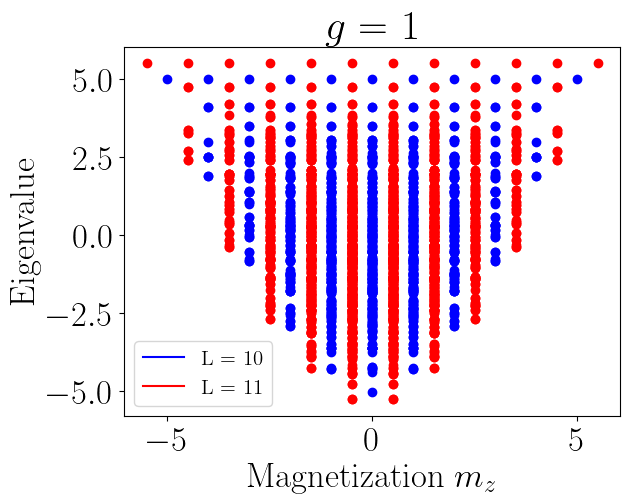

In [96]:
import matplotlib.lines as mlines


g = 1
J1 = 1
J2 = g * J1

L = 10
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J1,J2,mag,lookups) for mag in range(-L,L+1)]

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    if np.shape(h_mag) == (0,0):
        pass 
    v,_ = np.linalg.eig(h_mag) 
    for vv in v:
        plt.scatter(mag/2,vv,color='blue')


L = 11
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J1,J2,mag,lookups) for mag in range(-L,L+1)]

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    if np.shape(h_mag) == (0,0):
        pass 
    v,_ = np.linalg.eig(h_mag) 
    for vv in v:
        plt.scatter(mag/2,vv,color='red')
    
eight = mlines.Line2D([], [], color='blue',label='L = 10')
nine = mlines.Line2D([], [], color='red', label='L = 11')
# etc etc
plt.legend(handles=[eight, nine],loc='lower left',fontsize=15)
plt.xlabel('Magnetization $m_z$')
plt.ylabel('Eigenvalue')
plt.title('$g$ = ' + str(g))

# Vary $g$

/Users/siddhantm/miniconda3/envs/qt/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, '$g$ = 0.5')

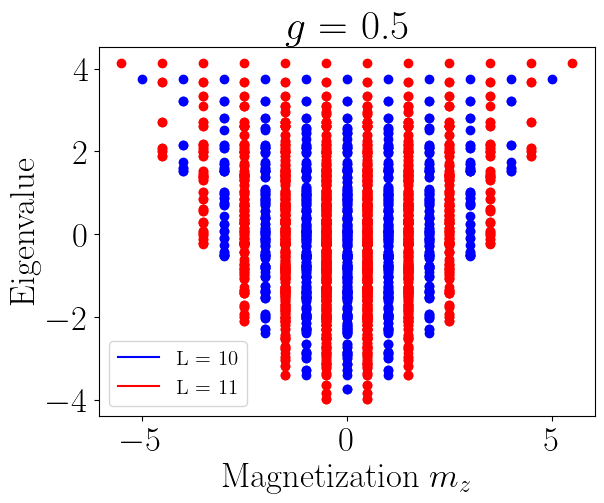

In [95]:
import matplotlib.lines as mlines


g = 0.5
J1 = 1
J2 = g * J1

L = 10
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J1,J2,mag,lookups) for mag in range(-L,L+1)]

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    if np.shape(h_mag) == (0,0):
        pass 
    v,_ = np.linalg.eig(h_mag) 
    for vv in v:
        plt.scatter(mag/2,vv,color='blue')


L = 11
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J1,J2,mag,lookups) for mag in range(-L,L+1)]

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    if np.shape(h_mag) == (0,0):
        pass 
    v,_ = np.linalg.eig(h_mag) 
    for vv in v:
        plt.scatter(mag/2,vv,color='red')
    
eight = mlines.Line2D([], [], color='blue',label='L = 10')
nine = mlines.Line2D([], [], color='red', label='L = 11')
# etc etc
plt.legend(handles=[eight, nine],loc='lower left',fontsize=15)
plt.xlabel('Magnetization $m_z$')
plt.ylabel('Eigenvalue')
plt.title('$g$ = ' + str(g))

/Users/siddhantm/miniconda3/envs/qt/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, '$g$ = 2')

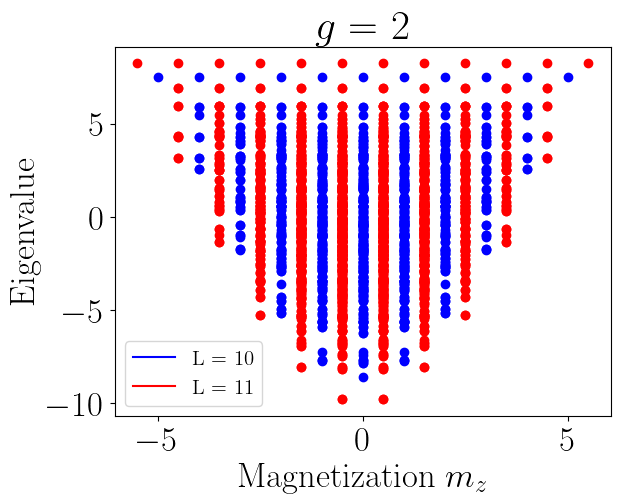

In [100]:
import matplotlib.lines as mlines


g = 2
J1 = 1
J2 = g * J1

L = 10
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J1,J2,mag,lookups) for mag in range(-L,L+1)]

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    if np.shape(h_mag) == (0,0):
        pass 
    v,_ = np.linalg.eig(h_mag) 
    for vv in v:
        plt.scatter(mag/2,vv,color='blue')


L = 11
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamils = [create_hamil_mag(L,J1,J2,mag,lookups) for mag in range(-L,L+1)]

for i, mag in enumerate(range(-L,L+1)):
    h_mag = hamils[i]
    if np.shape(h_mag) == (0,0):
        pass 
    v,_ = np.linalg.eig(h_mag) 
    for vv in v:
        plt.scatter(mag/2,vv,color='red')
    
eight = mlines.Line2D([], [], color='blue',label='L = 10')
nine = mlines.Line2D([], [], color='red', label='L = 11')
# etc etc
plt.legend(handles=[eight, nine],loc='lower left',fontsize=15)
plt.xlabel('Magnetization $m_z$')
plt.ylabel('Eigenvalue')
plt.title('$g$ = ' + str(g))

Thus, varying $g$ does _not_ change whether the $m_z = 0$ can be a G.S..

# II. Magnetiztion + Inversion symmetry

## Exercise 3: Computing in fixed $M_z=0$ + $\mathcal{I}$ operator's basis (for Heisenberg model) :
### Questions:
1. Find the eigenvalue spectrum for $L = 10$ in both spin-inversion sectors.
2. In which inversion sector the ground state lie for $L = 10$, and verify it's value with Full exact diagonalization.


In [8]:
L = 10
J=1
state_dict = create_statedict(L=L)
lookups = create_mag_lookups(L,state_dict)
hamil0 = create_hamil_mag(L,J,mag=0,lookups=lookups) 


/Users/siddhantm/miniconda3/envs/qt/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


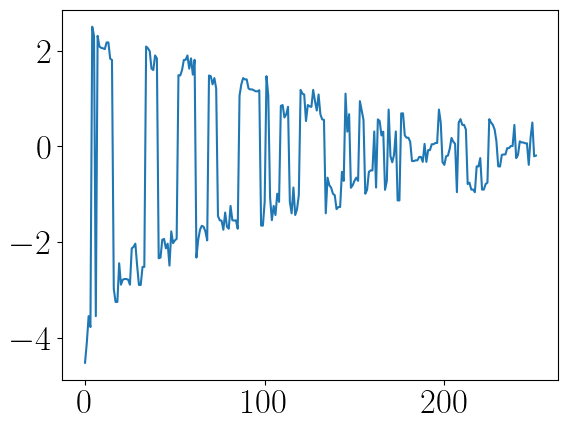

In [9]:
v,_ = np.linalg.eig(hamil0)
plt.plot(v)

In [10]:
def create_invsector_dict(L,state_dict,ref_site=0):#generating/tracking the states in one of + or - blocks
    ctr = 0
    lookup_inv = {}
    for i in range(2 ** L - 1):
        state = state_dict[i]
        if sum_str(state) == 0 and state[ref_site] == '1':
            lookup_inv[ctr] = state
            ctr += 1
    return lookup_inv


In [68]:
def flip_all(state):
    return ''.join('1' if x == '0' else '0' for x in state)
def find_ind_inv(state,lookup_inv):
    #state is in binary
    # state[0] = '1'
    lookup = lookup_inv
    low = 0
    high = len(lookup)
    mid = int(len(lookup)/2)
    while True:
        if int(lookup[mid],2) < int(state,2):
            low = mid
            mid = int((low+high)/2)
        elif int(lookup[mid],2) > int(state,2):
            high = mid
            mid = int((low+high)/2)
        elif int(lookup[mid],2) == int(state,2):
            return mid 
        
def spin_inv_plus(L,ref_site=0):
    # basic Hamiltonian creation in fixed mag sec + spin-inversion*/
    lookup_inv = create_invsector_dict(L,state_dict,ref_site=ref_site)
    mzp = len(lookup_inv)
    Hinv = np.zeros((mzp,mzp))
    for index in range(mzp):
        STATE = lookup_inv[index] # /*handling the bonds involving the ref. site separately*/
        SITE=0
        NBR_SITE1=1
        NBR_SITE2=L-1
        if (STATE)[SITE] == (STATE)[NBR_SITE1]:
            Hinv[index, index] += 1/4 # /* diag mat elem*/
        else:
            FLIPPED_STATE = flipbits(STATE,SITE,NBR_SITE1)
            FLIPPED_STATE = flip_all(FLIPPED_STATE)
            FLIPPED_INDEX = find_ind_inv(FLIPPED_STATE,lookup_inv)
            Hinv[index, FLIPPED_INDEX] = 1/2

        if (STATE)[SITE] == (STATE)[NBR_SITE2]:
            Hinv[index, index] += 1/4  
        else:
            FLIPPED_STATE = flipbits(STATE,SITE,NBR_SITE2)
            FLIPPED_STATE = flip_all(FLIPPED_STATE)
            FLIPPED_INDEX = find_ind_inv(FLIPPED_STATE,lookup_inv)
            Hinv[index, FLIPPED_INDEX] = 1/2
    # /*with ref. site exceptions handled, do as before for the rest of the bonds*/
        for SITE in range(1,L-1):
            NBR_SITE = (SITE + 1)% L #/*assumed pbc*/
            if (STATE)[SITE] == (STATE)[NBR_SITE]:
                Hinv[index, index] += 1/4 #/* diag mat elem*/
            else: #/*spin states are not same on SITE and NBR_SITE
                Hinv[index, index] -= 1/4 #/* diag mat elem*/
            if (STATE)[SITE] != (STATE)[NBR_SITE]:
                FLIPPED_STATE = flipbits(STATE,SITE,NBR_SITE)
                FLIPPED_INDEX = find_ind_inv(FLIPPED_STATE,lookup_inv)
                Hinv[index, FLIPPED_INDEX] = 1/2 #/* off-diag mat elem*/
    return Hinv

def spin_inv_minus(L,ref_site=0):
    # basic Hamiltonian creation in fixed mag sec + spin-inversion*/
    lookup_inv = create_invsector_dict(L,state_dict,ref_site=ref_site)
    mzp = len(lookup_inv)
    Hinv = np.zeros((mzp,mzp))
    for index in range(mzp):
        STATE = lookup_inv[index] # /*handling the bonds involving the ref. site separately*/
        SITE=0
        NBR_SITE1=1
        NBR_SITE2=L-1
        if (STATE)[SITE] == (STATE)[NBR_SITE1]:
            Hinv[index, index] += 1/4 # /* diag mat elem*/
        else:
            FLIPPED_STATE = flipbits(STATE,SITE,NBR_SITE1)
            FLIPPED_STATE = flip_all(FLIPPED_STATE)
            FLIPPED_INDEX = find_ind_inv(FLIPPED_STATE,lookup_inv)
            Hinv[index, FLIPPED_INDEX] = -1/2 #changed

        if (STATE)[SITE] == (STATE)[NBR_SITE2]:
            Hinv[index, index] += 1/4  
        else:
            FLIPPED_STATE = flipbits(STATE,SITE,NBR_SITE2)
            FLIPPED_STATE = flip_all(FLIPPED_STATE)
            FLIPPED_INDEX = find_ind_inv(FLIPPED_STATE,lookup_inv)
            Hinv[index, FLIPPED_INDEX] = -1/2 #changed
    # /*with ref. site exceptions handled, do as before for the rest of the bonds*/
        for SITE in range(1,L-1):
            NBR_SITE = (SITE + 1)% L #/*assumed pbc*/
            if (STATE)[SITE] == (STATE)[NBR_SITE]:
                Hinv[index, index] += 1/4 #/* diag mat elem*/
            else: #/*spin states are not same on SITE and NBR_SITE
                Hinv[index, index] -= 1/4 #/* diag mat elem*/
            if (STATE)[SITE] != (STATE)[NBR_SITE]:
                FLIPPED_STATE = flipbits(STATE,SITE,NBR_SITE)
                FLIPPED_INDEX = find_ind_inv(FLIPPED_STATE,lookup_inv)
                Hinv[index, FLIPPED_INDEX] = 1/2 #/* off-diag mat elem*/ 
    return Hinv


In [69]:
Hplus = spin_inv_plus(L,ref_site=0)
Hminus = spin_inv_minus(L,ref_site=0)

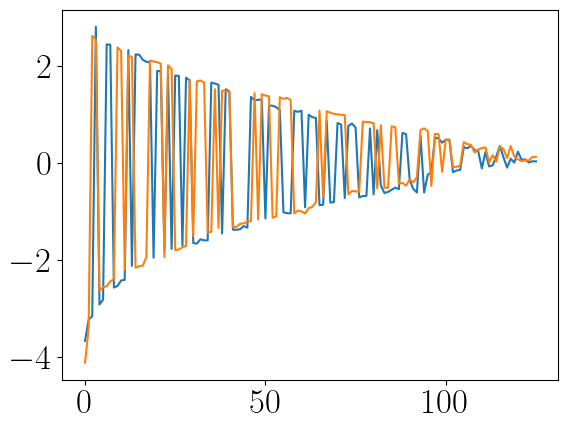

In [70]:
v,_ = np.linalg.eig(Hplus)
plt.plot(v)
v,_ = np.linalg.eig(Hminus)
plt.plot(v)